In [1]:
# Music Genre Classification Using RNN
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [2]:

DATA_PATH = "data.json"


def load_data(data_path):
    with open(data_path, "r") as fp:
        data = json.load(fp)
        X = np.array(data["mfcc"])
        y = np.array(data["labels"]) - 1
    return X, y


def plot_history(history):
    fig, axs = plt.subplots(2)

    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accucary eval")

    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()


In [3]:

def prepare_data(test_size, validation_size):

    X, y = load_data(DATA_PATH)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    return X_train, X_validation, X_test, y_train, y_validation, y_test


def build_model(input_shape):

    model = keras.Sequential()

    model.add(keras.layers.LSTM(units=168, return_sequences=True, input_shape=input_shape))
    model.add(keras.layers.LSTM(units=84))

    model.add(keras.layers.Dense(64, activation="relu"))
    model.add(keras.layers.Dropout(0.3))

    model.add(keras.layers.Dense(10, activation="softmax"))

    return model


def predict(model, X, y):

    X = X[np.newaxis, ...]
    prediction = model.predict(X)
    predicted_value = np.argmax(prediction, axis=1)

    print("Target: {}, Predicted label: {}".format(y, predicted_value))




X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_data(test_size=.15, validation_size=.1)

input_shape = (X_train.shape[1], X_train.shape[2])
print(f"There are {X_train.shape[0]} data points in training set and input shape is: {input_shape}")

model = build_model(input_shape=input_shape)

model.compile(optimizer=keras.optimizers.Adam(learning_rate=.001),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.summary()

history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), epochs=30, batch_size=32)

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print("\nTest Accuracy: ", test_accuracy)

X_to_predict, y_to_predict = X_test[2], y_test[2]
predict(model, X_to_predict, y_to_predict)

There are 3819 data points in training set and input shape is: (259, 13)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 259, 168)          122304    
_________________________________________________________________
lstm_1 (LSTM)                (None, 84)                85008     
_________________________________________________________________
dense (Dense)                (None, 64)                5440      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 213,402
Trainable params: 213,402
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
120/120 [=======================

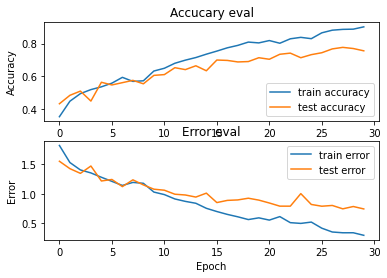

In [4]:
plot_history(history)